# Clustering

`Its an unsupervised learning methods`<br>
**Unsupervised learning methods are the methods wherein you dont have any labelled response**
**[CoreIdea]:** its basically as task of dividing the population of data points(instances)into no of groups such that point in the same groups are similar to other data poins in the same group but disimilar to the points in other groups.

based on some similarity/dissimilarity measure the data points are togeher are cubbed together 





into no of clusters






















## Types of Clustering:

Broadly there are 2 types:
    
- ** Hard Clustering:** in hard clustring , the data points either belong to one cluster completely or they dont.
- ** Soft Clustering:** in soft clustering, instead of putting each the data point into a seperate clusters,a probability or likelihood of the data pt.to be in a cluster is evaluated,

## Types of Clustering Algorithms(Categorizing basaed on underlying approach)

- **`Connectivity based models`**: These models are based on the fact that the data points closer to in data-space are said to be similar to each other than the data points lying further apart.
        - in one approach, the model satrts by classifyjng all the data pts.into seperate clusters and then aggregate them as the distance bw decreases.
        - in an another approach, all the data pts are classifed as one big sngle cluster and then its partitionedd into the sub clustes as the distsnce  bw them increases.
  E.g. Hierarachial clusteing Algoritms and its variants.
  
  
- **`Centroid based models`**: these are iterative clustering algoithm.,<br> the Similarity measure is derived by meaduring the closerness of any data point to centroid of a cluster.<br>in these models, the no.of clustes to form is mentioned before.<br> at each iteration, as the clusters to formed the centroid for each cluster ar also updated every time.<br>these models is run iteratively untill to a poitn you've reached a local optima.(basically your centroids are not changing any more.)<br>
E.g.,K-means Clustering aslgorithm and all its variant.

- `**Didstribution based models**`: These clustering models are based on how probable is it that all the data pts in the cluster belongs to the same distribution (choice of distribution id again subjective, say Gaussian or normal distribution,etc)<br>
these models are very prone to overfitting, very very often!!!
e.g., Expectation-Maximization algorithm(uses multivariate normal distribution)

- **`Density Based models`**: these models search the entire data space for area of varying density of data pts.withnin the same data space.<br>
it Isolates varios density regions and tehn assigns all the data pts. within these density regions as on cluster<br>
e.g.,DBSCAN And OPTICS.



## K-Means Clustering
**[algo]**

- first intialize $k$ centroids randomly : $k$ distinct instances are choosen randomly fom the data set and the centroids are placed at their locations.
- repeat/loop-through:
          - assign each instances to the  cluster of closest centroid.
          - update the centroids to the mean of all the instances that are assigned ot that particular cluster


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.datasets import make_blobs



In [46]:
# some centers around which blobs would be generated
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])

# std deviation for the blobs to be generated
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


In [47]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=29)

In [48]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


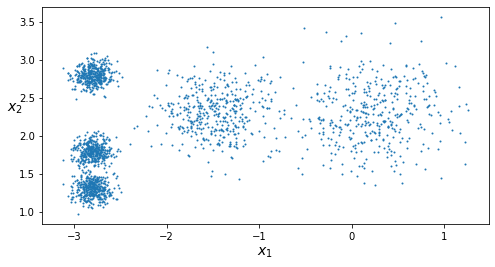

In [49]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()


In [50]:
from sklearn.cluster import KMeans 

k = 5
kmeans = KMeans(n_clusters = k, random_state=29)
y_pred  = kmeans.fit_predict(X)

In [51]:
y_pred

array([4, 1, 0, ..., 2, 3, 0])

In [52]:
#each instancein y_predict id asigned to one of five classes
kmeans.labels_

array([4, 1, 0, ..., 2, 3, 0])

In [53]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3.2,5]])
kmeans.predict(x_new)

array([0, 0, 4, 4])

In [54]:
#Estimate the centroids,

kmeans.cluster_centers_

array([[ 0.24284943,  2.28897332],
       [-2.78876984,  1.80235487],
       [-2.80405016,  1.30190541],
       [-1.45056887,  2.30811625],
       [-2.79333067,  2.79480463]])

In [55]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


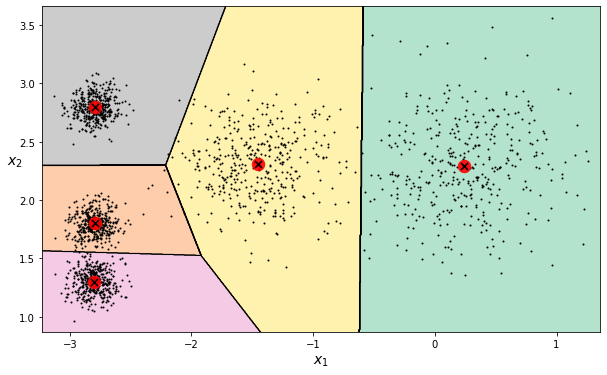

In [56]:
plt.figure(figsize=(10,6))
plot_decision_boundaries(kmeans, X)
plt.show()

**How do you find the right value for the no of clusters?**

**Elbow Method**: 
The idea of the elbow method is determine the optimal value of k. 

In [58]:
kmeans.inertia_ 

219.6475514904845

**Inertia makes the assumption that clusters are convex and isotropic, which is not always the case.**

In [64]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=29).fit(X) 
                for k in range(1, 10)]
inertias = [model.inertia_ 
            for model in kmeans_per_k]
